In [1]:
using Plots

In [2]:
r = 0.9
ϕ = π / 4

max_r = 10.0
μ = r * exp(im * ϕ)
B(z; μ=μ) = (z * (μ - z)) / (1 - μ' * z)

B (generic function with 1 method)

The annulus is
$$
A_{r, R} = \{z \mid T'(z), 1/T'(z) \textrm{ is holomorphic}\}
$$

We check that the lines with constant imaginary part end up above themselves.

In [3]:
bigger_radius(ρ) = minimum(abs.(B.([ρ * exp(im * 2 * π * θ) for θ in 0:0.001:1]))) - ρ

bigger_radius (generic function with 1 method)

In [4]:
smaller_radius(ρ) = 1 / ρ - maximum(abs.(B.([exp(im * 2 * π * θ) / ρ for θ in 0:0.001:1])))

smaller_radius (generic function with 1 method)

In [5]:
radius(ρ) = min(bigger_radius(ρ), smaller_radius(ρ))

radius (generic function with 1 method)

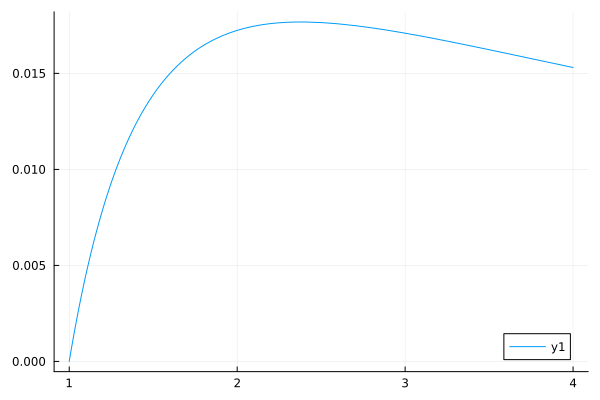

In [6]:
plot(radius, 1.0, 4.0)

In [7]:
step = 0.001

bestrad, indexrad = findmax([radius(η) for η in 1.0:step:max_r])

(0.017677808218615754, 1379)

In [8]:
η = 1.0 + step * indexrad

2.379

In [9]:
all(abs.(B.([η * exp(im * 2 * π * θ) for θ in 0:0.001:1])) .> η)

true

In [10]:
ρup = minimum(abs.(B.([η * exp(im * 2 * π * θ) for θ in 0:0.001:1])))

2.483442424628315

In [11]:
all(abs.(B.([exp(im * 2 * π * θ) / η for θ in 0:0.001:1])) .< 1 / η)

true

In [12]:
ρdown = maximum(abs.(B.([exp(im * 2 * π * θ) / η for θ in 0:0.001:1])))

0.40266687485201724

In [13]:
1 / ρdown

2.483442424628315

In [14]:
ρ = min(abs(ρup), abs(1 / ρdown))

2.483442424628315

The problem now reduces to compute the zeros of 
$$
B'(z; \mu) = \frac{-2z+\mu+z^2\mu'}{1-z\mu'}^2
$$.

By solving for $z$ roots are given by 
$$
\frac{1-\sqrt{1-\mu\mu'}}{\mu'}
$$
and
$$
\frac{1+\sqrt{1-\mu\mu'}}{\mu'}
$$

In [15]:
pole = (1 + sqrt(1 - μ * μ')) / μ'

r_pole = abs(pole)

1.5954332159489635

In [16]:
r_pole > η

false

Since the pole is inside the annulus, we need to use the modulus of the pole to compute the annulus.

In [17]:
ρup = minimum(abs.(B.([r_pole * exp(im * 2 * π * θ) for θ in 0:0.001:1])))

1.634432266472805

In [18]:
ρdown = 1/maximum(abs.(B.([exp(im * 2 * π * θ) / r_pole for θ in 0:0.001:1])))

1.6344322664728046

In [19]:
ρ = log(ρup)
η = log(r_pole)

@info η, ρ, ρ-η

┌ Info: (0.4671453081032619, 0.49129550641695896, 0.02415019831369708)
└ @ Main /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/annuli_blashke.ipynb:4


Since the pole is outside the $\eta$ strip, the constants are $\eta$ and $\rho$, and the constant is given by:
$$
\sqrt{1+2 \frac{e^{4\pi(\alpha-\eta)}}{1-e^{4\pi(\alpha-\eta)}}} e^{2\pi \eta}\left(1+2\frac{e^{-2 \pi (\rho-\alpha)}}{1-e^{-2 \pi (\rho-\alpha)}}\right)
$$
for some $\eta<\alpha<\rho$.

In [20]:
C(α; η, ρ) = sqrt(1 + 2 * exp(4 * pi * (η - α)) / (1 - exp(4 * pi * (η - α))))exp(2 * pi * η) * (1 + 2 * exp(-2 * pi * (ρ - α)) / (1 - exp(-2 * pi * (ρ - α))))

C (generic function with 1 method)

In [21]:
C(α) = C(α; η=η, ρ=ρ)

C (generic function with 1 method)

In [22]:
N = 1024
vals = C.([η + i * (ρ - η) / N for i in 1:N-1])

1023-element Vector{Float64}:
  20441.277491354915
  14468.255111769704
  11824.807263248284
  10250.58535347916
   9177.365865995791
   8385.949285124212
   7771.48601146364
   7276.687989229007
   6867.261341684957
   6521.257350587502
      ⋮
  73064.51221004066
  82157.71643690953
  93849.04757184982
 109437.56887338297
 131261.59420769673
 163997.75130795504
 218558.1715531466
 327679.2490820775
 655042.9545929304

In [23]:
best, index = findmin(vals)

(1656.9538520323872, 341)

In [24]:
α = η + index * (ρ - η) / N

0.4751875128151473

In [25]:
ratio = exp(-2 * π * α)

0.05050458278121349

In [26]:
k = 128

128

In [27]:
strong_weak = sqrt(2) * sqrt(ratio^k / (1 - ratio))

1.4960254346731854e-83

In [28]:
(strong_weak * best)

2.478845106720161e-80

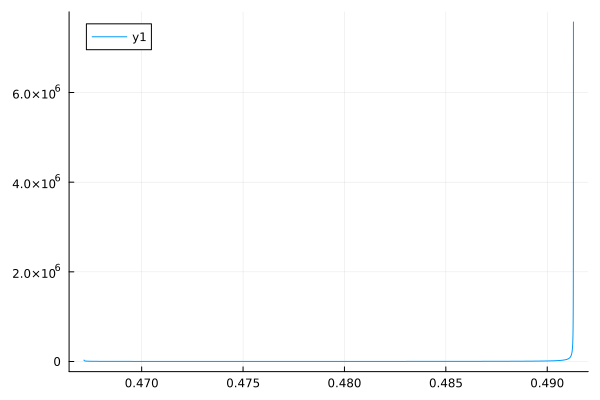

In [29]:
plot(α -> C(α; η=η, ρ=ρ), η, ρ)